Importing necessary packages.

In [36]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


Loading the dataset from the data folder into a pyhton pandas Dataframe.

In [4]:
raw_df = pd.read_csv("../data/breast-cancer.csv")

In [58]:
#Taking a look at the dataframe to make sure it has loaded correctly.
raw_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


All of the feature datatypes should be numerical.

In [6]:
raw_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Investigating the percent of features that are null. Since we only have two target classes it woun't be hard to see how the percent of null values differentiates across features and classes. In this case the dataset appears to have no null values.

In [7]:
diagnosis = raw_df['diagnosis'].unique()

for category in diagnosis:
    filtered_df = raw_df[raw_df['diagnosis'] == category]
    percentage_not_null = filtered_df.notnull().mean() * 100
    print(f"Diagnosis: {category}")
    print(percentage_not_null)
    print("\n")


Diagnosis: M
id                         100.0
diagnosis                  100.0
radius_mean                100.0
texture_mean               100.0
perimeter_mean             100.0
area_mean                  100.0
smoothness_mean            100.0
compactness_mean           100.0
concavity_mean             100.0
concave points_mean        100.0
symmetry_mean              100.0
fractal_dimension_mean     100.0
radius_se                  100.0
texture_se                 100.0
perimeter_se               100.0
area_se                    100.0
smoothness_se              100.0
compactness_se             100.0
concavity_se               100.0
concave points_se          100.0
symmetry_se                100.0
fractal_dimension_se       100.0
radius_worst               100.0
texture_worst              100.0
perimeter_worst            100.0
area_worst                 100.0
smoothness_worst           100.0
compactness_worst          100.0
concavity_worst            100.0
concave points_worst       100

Setting up a function that compares a set of columns passed from the dataframe by the diagnosis category.

In [46]:
def boxplot_compare(df: pd.DataFrame, columns: [str]):
  plt.figure(figsize=(12,6))
  for col in df[columns].columns:
    plt.subplot(1, len(df[columns].columns), df[columns].columns.get_loc(col) + 1)
    sns.boxplot(x='diagnosis', y=col, data=df)
    plt.title(f'{col} vs diagnosis')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

The feature columns fall into two sets of groups, the primary group is a feature of the patient. The list  being []. From there each of those includes a faure in the dataframe for its mean, worst, and standard error. We will use the function defined above to compare all of the features in the dataframe appropraitely.

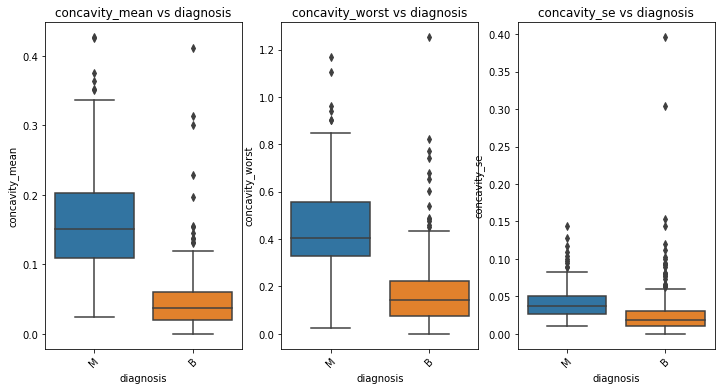

In [47]:
boxplot_compare(df, ['concavity_mean', 'concavity_worst', 'concavity_se'])

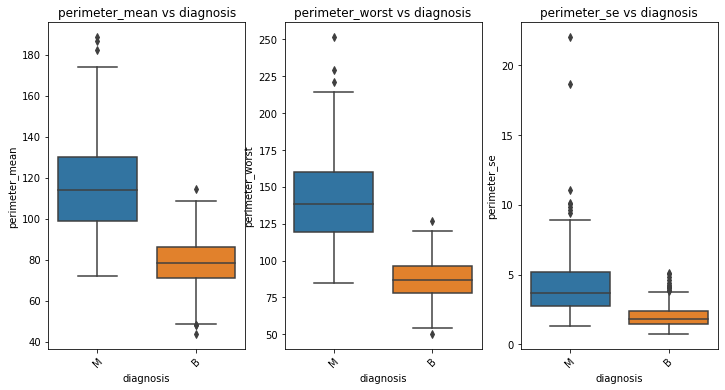

In [48]:
boxplot_compare(df, ['perimeter_mean', 'perimeter_worst', 'perimeter_se'])

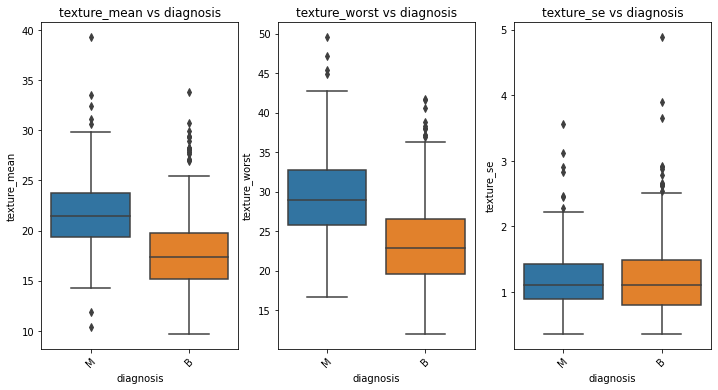

In [49]:
boxplot_compare(df, ['texture_mean', 'texture_worst', 'texture_se'])

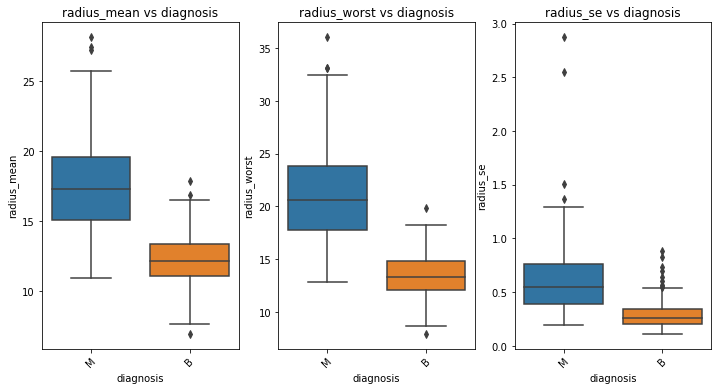

In [50]:
boxplot_compare(df, ['radius_mean', 'radius_worst', 'radius_se'])

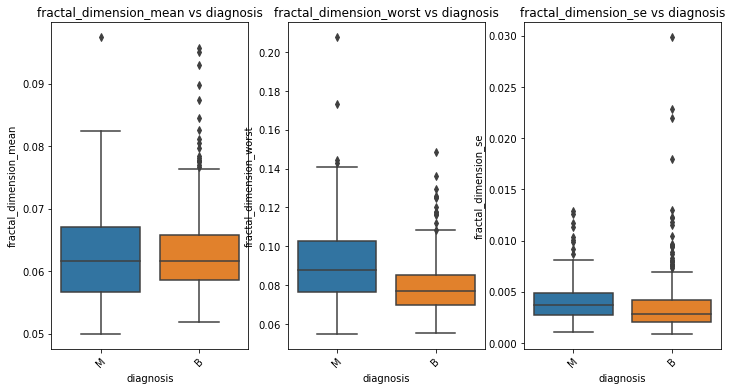

In [51]:
boxplot_compare(df, ['fractal_dimension_mean', 'fractal_dimension_worst', 'fractal_dimension_se'])

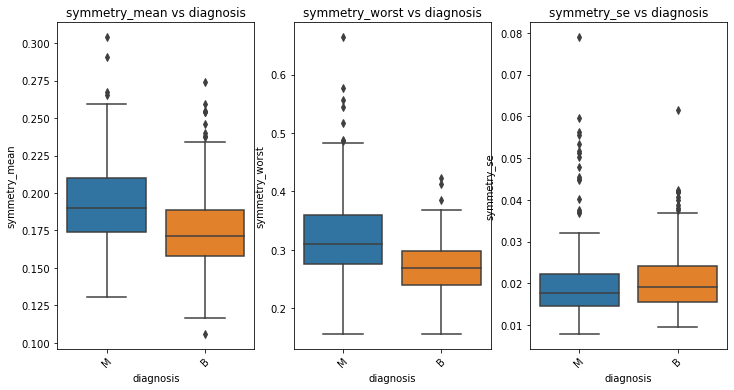

In [52]:
boxplot_compare(df, ['symmetry_mean', 'symmetry_worst', 'symmetry_se'])

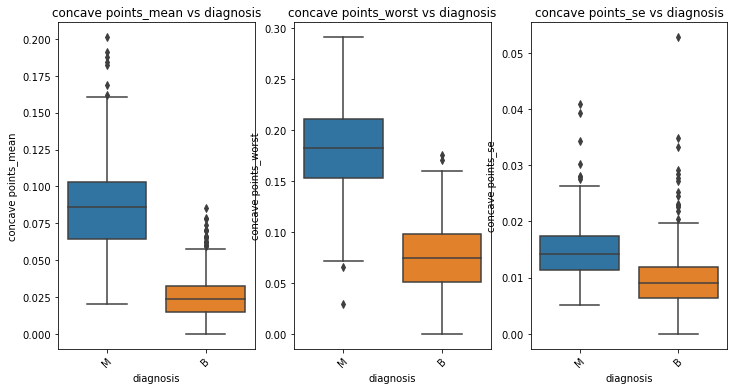

In [53]:
boxplot_compare(df, ['concave points_mean', 'concave points_worst', 'concave points_se'])

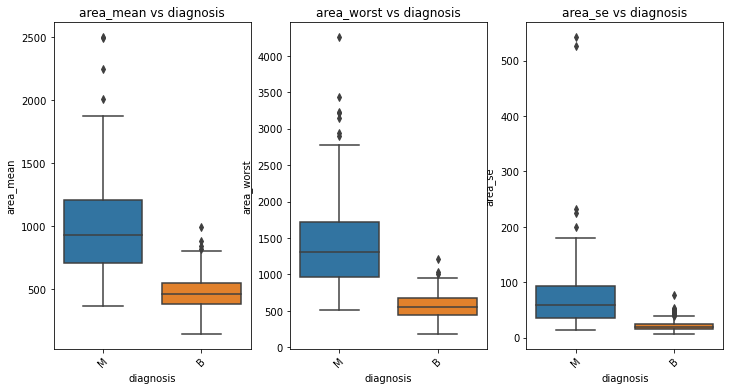

In [54]:
boxplot_compare(df, ['area_mean', 'area_worst', 'area_se'])

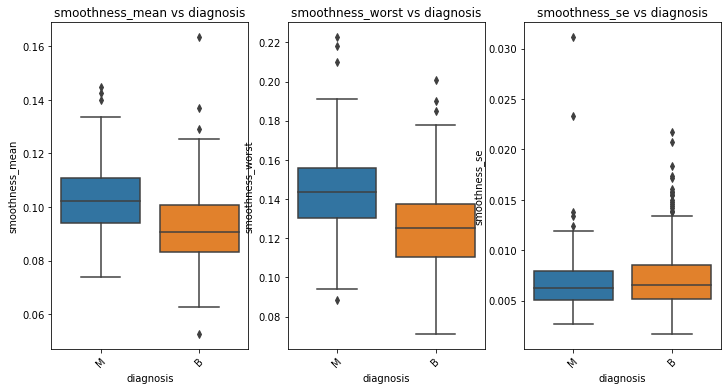

In [55]:
boxplot_compare(df, ['smoothness_mean', 'smoothness_worst', 'smoothness_se'])

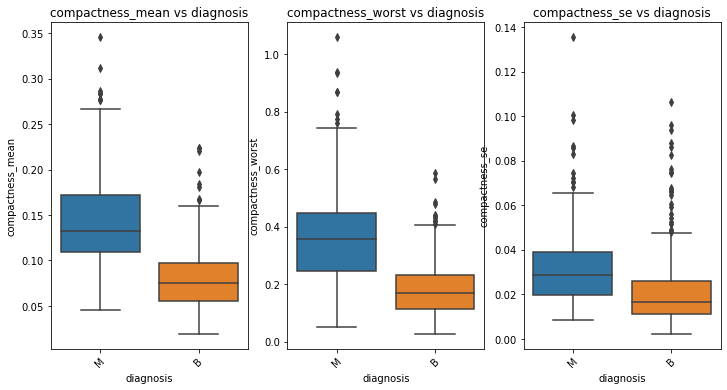

In [56]:
boxplot_compare(df, ['compactness_mean', 'compactness_worst', 'compactness_se'])

In [57]:
columns = raw_df.columns.to_list()
feature_col = [col for col in columns if col not in ['id', 'diagnosis']]

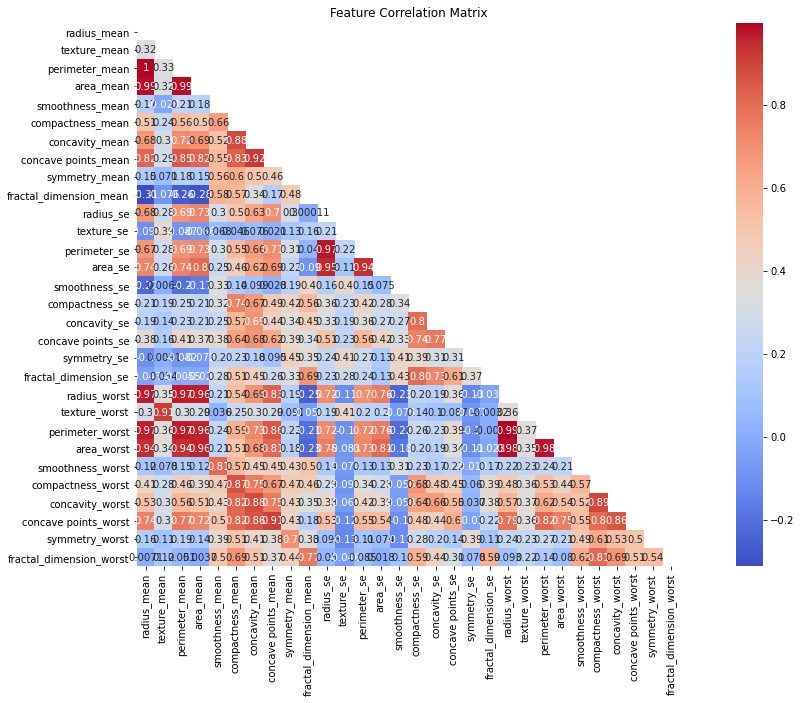

In [42]:
df = raw_df.drop(columns=['id'])
corr_matrix = df.corr()
half_matrix = np.tri(*corr_matrix.shape, dtype=bool) == 0
np.fill_diagonal(corr_matrix.values, np.nan)
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_matrix, mask=half_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.show()